# **Imports**

In [317]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

# **Lectura y analisis del dataset**

In [2]:
url_dataset = "https://raw.githubusercontent.com/nicoolasps/Twitter-Sentiment-Analysis/main/twitter_tweets.csv"
df_twitter = pd.read_csv(url_dataset, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])
df_twitter.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df_twitter['Entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [4]:
df_twitter['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

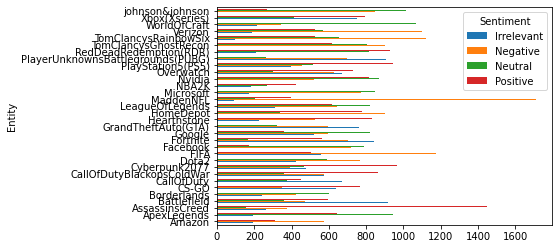

In [5]:
entity_sentiment = df_twitter.groupby(['Entity','Sentiment']).Sentiment.count().unstack()
entity_sentiment.plot(kind='barh')

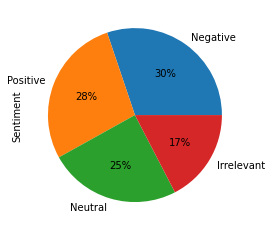

In [6]:
df_twitter.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

## **SciKitLearn**

**Creación matriz con los Tweets**

In [233]:
tweet_content = df_twitter.iloc[:, 3].values
tweet_content

array(['im getting on borderlands and i will murder you all ,',
       'I am coming to the borders and I will kill you all,',
       'im getting on borderlands and i will kill you all,', ...,
       'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice',
       'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice',
       'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice'],
      dtype=object)

In [234]:
entities = df_twitter.iloc[:, 1].values
entities

array(['Borderlands', 'Borderlands', 'Borderlands', ..., 'Nvidia',
       'Nvidia', 'Nvidia'], dtype=object)

In [235]:
processed_tweets = []
for tweet in range(0, len(tweet_content)):
    processed_tweet = re.sub(r'\W', ' ', str(tweet_content[tweet]))
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    processed_tweet = processed_tweet.lower()
    processed_tweets.append(processed_tweet)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [236]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_tweets = vectorizer.fit_transform(processed_tweets).toarray()

**Dividiendo el dataset**

In [237]:
X_train, X_test, y_train, y_test = train_test_split(processed_tweets, entities, test_size=0.2, random_state=1)

**Random Forest Classifier**

In [238]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=10, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [239]:
predictions = text_classifier.predict(X_test)

In [326]:
rfc_accuracy = accuracy_score(y_test, predictions)
rfc_accuracy

0.8383108108108108

In [241]:
n_scores = cross_val_score(text_classifier, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1, error_score='raise')

In [242]:
n_scores

array([0.83597973, 0.84172297, 0.83260135, 0.83564189, 0.83733108,
       0.83885135, 0.83358675, 0.83257307, 0.83662781, 0.83172833])

**Gráfico precisión al entrenar el modelo**

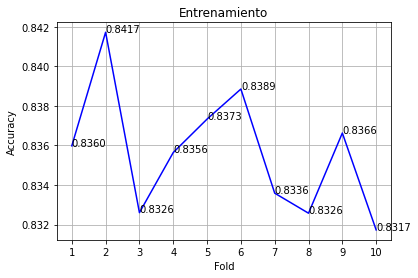

In [342]:
cv_rfc = {'Fold': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], 'Accuracy': n_scores}
cv_table = pd.DataFrame(cv_rfc, columns = ['Fold', 'Accuracy'])
g_cv = sns.lineplot(x = 'Fold', y = 'Accuracy', data = cv_table, color = 'blue')

for x, y in zip(cv_table['Fold'], cv_table['Accuracy']):
 plt.text(x = x, y = y, s = '{:.4f}'.format(y)) 

g_cv.set(title='Entrenamiento')
plt.grid('y')
plt.show()

# **Keras**

In [288]:
df_twitter = df_twitter.dropna()
df_keras = df_twitter.sample(frac=0.1)
df_keras.reset_index(drop=True, inplace=True)
df_keras

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,10882,TomClancysGhostRecon,Neutral,Filter selfies are I AM getting pretty murdere...
1,9219,Overwatch,Positive,Great game night with my husband @ xtremefanat...
2,8880,Nvidia,Negative,Do not understand how Nvidia can issue a card ...
3,666,ApexLegends,Positive,Oh man how this story is very good!!.. -. -...
4,8539,NBA2K,Positive,H Mad respect RhandlerR . pic.twitter.com/SFl...
...,...,...,...,...
7395,10791,RedDeadRedemption(RDR),Positive,I enjoy the details that Leo captures in games.
7396,8594,NBA2K,Negative,Wow @ N2K wtf why Park & Rec?????? Spend too m...
7397,7876,MaddenNFL,Negative,Double DOG! Wtf think is Vick doing?
7398,10963,TomClancysGhostRecon,Positive,Wow the new upgrading update for... Lots of Sp...


In [289]:
sentiments = list(df_keras["Sentiment"].unique())
sentiments

['Neutral', 'Positive', 'Negative', 'Irrelevant']

In [290]:
onehot_ = pd.get_dummies(df_keras["Entity"], prefix="Entity")
df_keras = df_keras.join(onehot_)
df_keras.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,Entity_CallOfDutyBlackopsColdWar,Entity_Cyberpunk2077,Entity_Dota2,Entity_FIFA,Entity_Facebook,Entity_Fortnite,Entity_Google,Entity_GrandTheftAuto(GTA),Entity_Hearthstone,Entity_HomeDepot,Entity_LeagueOfLegends,Entity_MaddenNFL,Entity_Microsoft,Entity_NBA2K,Entity_Nvidia,Entity_Overwatch,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson
0,10882,TomClancysGhostRecon,Neutral,Filter selfies are I AM getting pretty murdere...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,9219,Overwatch,Positive,Great game night with my husband @ xtremefanat...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8880,Nvidia,Negative,Do not understand how Nvidia can issue a card ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,666,ApexLegends,Positive,Oh man how this story is very good!!.. -. -...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8539,NBA2K,Positive,H Mad respect RhandlerR . pic.twitter.com/SFl...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [291]:
df_keras = df_keras.drop('Entity', axis=1)

**Le damos un valor númerico al sentimiento**

In [292]:
class_to_index = {"Neutral":0, "Irrelevant":1, "Negative":2, "Positive": 3}
index_to_class = dict((v,k) for k, v in class_to_index.items())
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])
ids_to_names = lambda n: np.array([index_to_class.get(x) for x in n])
df_keras["Sentiment"] = names_to_ids(df_keras["Sentiment"])
df_keras.head()

,Tweet_ID,Sentiment,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,Entity_CallOfDutyBlackopsColdWar,Entity_Cyberpunk2077,Entity_Dota2,Entity_FIFA,Entity_Facebook,Entity_Fortnite,Entity_Google,Entity_GrandTheftAuto(GTA),Entity_Hearthstone,Entity_HomeDepot,Entity_LeagueOfLegends,Entity_MaddenNFL,Entity_Microsoft,Entity_NBA2K,Entity_Nvidia,Entity_Overwatch,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson
0,10882,0,Filter selfies are I AM getting pretty murdere...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,9219,3,Great game night with my husband @ xtremefanat...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8880,2,Do not understand how Nvidia can issue a card ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,666,3,Oh man how this story is very good!!.. -. -...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8539,3,H Mad respect RhandlerR . pic.twitter.com/SFl...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**NLP**

In [272]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Separar la frase en una lista de palabras**

In [293]:
df_keras["Tweet_Content_Split"] = df_keras["Tweet_Content"].apply(word_tokenize)
df_keras["Tweet_Content_Split"]

0       [Filter, selfies, are, I, AM, getting, pretty,...
1       [Great, game, night, with, my, husband, @, xtr...
2       [Do, not, understand, how, Nvidia, can, issue,...
3       [Oh, man, how, this, story, is, very, good, !,...
4       [H, Mad, respect, RhandlerR, ., pic.twitter.co...
                              ...                        
7395    [I, enjoy, the, details, that, Leo, captures, ...
7396    [Wow, @, N2K, wtf, why, Park, &, Rec, ?, ?, ?,...
7397     [Double, DOG, !, Wtf, think, is, Vick, doing, ?]
7398    [Wow, the, new, upgrading, update, for, ..., L...
7399    [I, love, playing, gta, and, cod, always, so, ...
Name: Tweet_Content_Split, Length: 7400, dtype: object

**Función para remover conectores dentro de la frase**

In [294]:
def remove_stopwords(ls):
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stop_english) and (word.isalpha())]
    ls = " ".join(ls)
    return ls

**Realizamos una lematización en la palabra**

In [295]:
lemmatiser = WordNetLemmatizer()
stop_english = Counter(stopwords.words())
df_keras["Tweet_Content_Split"] = df_keras["Tweet_Content_Split"].apply(remove_stopwords)
df_keras["Tweet_Content_Split"]

0       Filter selfies I AM getting pretty murdered an...
1       Great game night husband xtremefanatik friend ...
2       Do understand Nvidia issue card merchant witho...
3                                           Oh story good
4                                 H Mad respect RhandlerR
                              ...                        
7395                      I enjoy detail Leo capture game
7396      Wow wtf Park Rec Spend much money game supposed
7397                            Double DOG Wtf think Vick
7398    Wow new upgrading update Lots Splinter Cell th...
7399             I love playing gta cod always passionate
Name: Tweet_Content_Split, Length: 7400, dtype: object

**Escaneamos la palabra**

In [296]:
tokeniser = Tokenizer(num_words=1000, lower=True)
tokeniser.fit_on_texts(df_keras["Tweet_Content_Split"])

In [297]:
tweet_tokens = tokeniser.texts_to_matrix(list(df_keras["Tweet_Content_Split"]))

In [298]:
full_df = pd.concat([df_keras, pd.DataFrame(tweet_tokens)], sort=False, axis=1)

In [299]:
y = full_df["Sentiment"]
full_df = full_df.drop(["Sentiment", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split"], axis=1)

**Dividimos el dataset en los conjuntos de prueba y entrenamiento**

In [300]:
X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(full_df, y, test_size=0.2, random_state=1)

**Creamos el modelo**

In [301]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_dim=1032, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

**Entrenamos el modelo con 10 iteraciones**

In [302]:
h = model.fit(
     X_train_keras, y_train_keras,
     validation_data=(X_test_keras, y_test_keras),
     epochs=10,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]
)

Epoch 1/10
185/185 [==============================] - 1s 4ms/step - loss: 1.3215 - accuracy: 0.3647 - val_loss: 1.1948 - val_accuracy: 0.4608
Epoch 2/10
185/185 [==============================] - 0s 2ms/step - loss: 1.0848 - accuracy: 0.5277 - val_loss: 1.1100 - val_accuracy: 0.5291
Epoch 3/10
185/185 [==============================] - 0s 2ms/step - loss: 0.9249 - accuracy: 0.6302 - val_loss: 1.0969 - val_accuracy: 0.5622
Epoch 4/10
185/185 [==============================] - 0s 2ms/step - loss: 0.8183 - accuracy: 0.6851 - val_loss: 1.1327 - val_accuracy: 0.5642
Epoch 5/10
185/185 [==============================] - 0s 3ms/step - loss: 0.7224 - accuracy: 0.7299 - val_loss: 1.1656 - val_accuracy: 0.5554
Epoch 6/10
185/185 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7696 - val_loss: 1.2284 - val_accuracy: 0.5608
Epoch 7/10
185/185 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7983 - val_loss: 1.2906 - val_accuracy: 0.5568
Epoch 

**Gráfico de los resultados obtenidos**

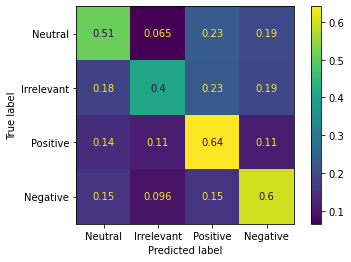

In [303]:
y_pred_keras = np.argmax(model.predict(X_test_keras), axis=1)
y_pred_labels = ids_to_names(y_pred_keras)
y_test_labels = ids_to_names(y_test_keras)
y_unique = list(set(y_test_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

**Precision general del modelo**

In [325]:
keras_accuracy = accuracy_score(y_test_keras, y_pred_keras)
keras_accuracy

0.552027027027027

**Gráfico precisión al entrenar el modelo**

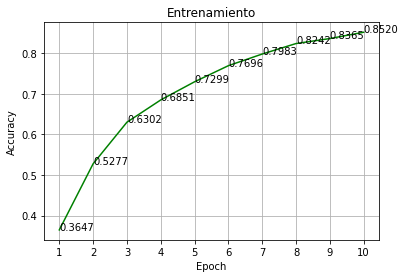

In [341]:
epochs_keras = {'Epoch': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], 'Accuracy': h.history['accuracy']}
epochs_table = pd.DataFrame(epochs_keras, columns = ['Epoch', 'Accuracy'])
g = sns.lineplot(x = 'Epoch', y = 'Accuracy', data = epochs_table, color = 'green')

for x, y in zip(epochs_table['Epoch'], epochs_table['Accuracy']):
 plt.text(x = x, y = y, s = '{:.4f}'.format(y)) 

g.set(title='Entrenamiento')
plt.grid('y')
plt.show()

# **Comparación de modelos**

In [327]:
def mostrarValores(grafico):
    for p in grafico.patches:
      _x = p.get_x() + p.get_width() / 2
      _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
      value = '{:.4f}'.format(p.get_height())
      grafico.text(_x, _y, value, ha="center") 

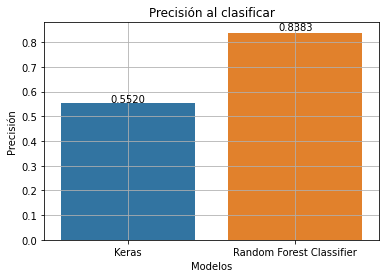

In [339]:
accuracy_models = {'Modelos': ['Keras', 'Random Forest Classifier'], 'Precisión': [keras_accuracy, rfc_accuracy]}
accuracy_table = pd.DataFrame(accuracy_models, columns = ['Modelos', 'Precisión'])
grafico = sns.barplot(x = 'Modelos', y = 'Precisión', data = accuracy_table)
mostrarValores(grafico,)
plt.grid('y')
grafico.set(title='Precisión al clasificar')
plt.show()
